# CSE474/574 - Programming Assignment 2

## Part 3 - Image Classification with Deep[er] neural networks

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
# !/usr/bin/env python3

In [2]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [4]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

In [5]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
n_classes = len(np.unique(train_label))
# convert labels to 0-1 hot encoding
train_label_01 = np.zeros((train_label.shape[0], n_classes))
a = np.arange(train_label.shape[0], dtype=np.int64)
b = np.array(train_label, dtype=np.int64).reshape((train_label.shape[0],))
train_label_01[a, b] = 1

test_label_01 = np.zeros((test_label.shape[0], n_classes))
c = np.arange(test_label.shape[0], dtype=np.int64)
d = np.array(test_label, dtype=np.int64).reshape((test_label.shape[0],))
test_label_01[c, d] = 1

**WARNING**: This cell will take a significantly long time to run

In [59]:
model = Sequential()
M = 80
L = 2
activation = 'tanh' # other options 'relu', 'tanh'
# this is the first hidden layer
model.add(Dense(M, activation=activation, input_dim=train_data.shape[1]))
# you can add more Dense layers here
for l in range(1,L):
    model.add(Dense(M, activation=activation, input_dim=M))
# this is the output layer
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 80)                62800     
_________________________________________________________________
dense_47 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                810       
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________


In [61]:
st = time.time()
model.fit(train_data, train_label_01, epochs=50, batch_size=32)
en = time.time()
print("Training completed in {:.2f} seconds.".format(en-st))

Epoch 1/50
782/782 [==============================] - 2s 935us/step - loss: 1.6174 - accuracy: 0.4474
Epoch 2/50
782/782 [==============================] - 1s 913us/step - loss: 1.1818 - accuracy: 0.6099
Epoch 3/50
782/782 [==============================] - 1s 902us/step - loss: 1.0528 - accuracy: 0.6595
Epoch 4/50
782/782 [==============================] - 1s 896us/step - loss: 1.0040 - accuracy: 0.6743
Epoch 5/50
782/782 [==============================] - 1s 891us/step - loss: 0.9743 - accuracy: 0.6837
Epoch 6/50
782/782 [==============================] - 1s 897us/step - loss: 0.9537 - accuracy: 0.6898
Epoch 7/50
782/782 [==============================] - 1s 891us/step - loss: 0.9182 - accuracy: 0.7029
Epoch 8/50
782/782 [==============================] - 1s 890us/step - loss: 0.8982 - accuracy: 0.7113
Epoch 9/50
782/782 [==============================] - 1s 892us/step - loss: 0.8687 - accuracy: 0.7228
Epoch 10/50
782/782 [==============================] - 1s 904us/step - loss: 0.870

In [62]:
train_predicted = model.predict_classes(train_data)
acc_train = np.where(train_label == train_predicted)[0].shape[0]/train_data.shape[0]
print('Training set Accuracy: {:.2f}%'.format(100 * acc_train))

test_predicted = model.predict_classes(test_data)
acc_test = np.where(test_label == test_predicted)[0].shape[0]/test_data.shape[0]
print('Testing set Accuracy : {:.2f}%'.format(100 * acc_test))

Training set Accuracy: 79.15%
Testing set Accuracy : 75.30%


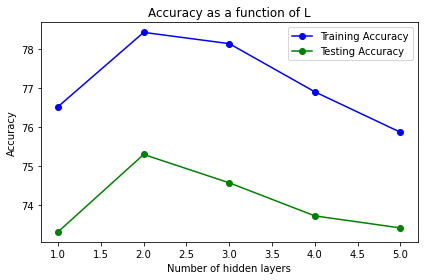

In [68]:
train_errors_lambda = [76.53,78.44,78.15,76.91,75.87]
test_errors_lambda = [73.31,75.30,74.57,73.72,73.41]


n_hidden_range = np.arange(start=1, stop=6, step=1)

plt.plot(n_hidden_range, train_errors_lambda, 
     label = "Training Accuracy", color = 'b',marker='o')
plt.plot(n_hidden_range, test_errors_lambda,
   label = "Testing Accuracy", color = 'g',marker='o')
  
# Creating the plot
plt.title("Accuracy as a function of L")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

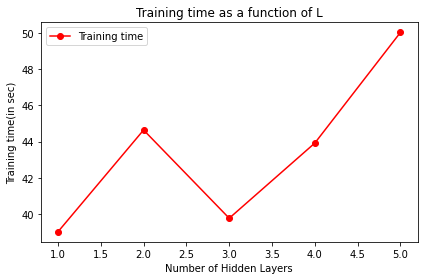

In [74]:
training_time = [39.02,44.64,39.77,43.92,50.03]

plt.plot(n_hidden_range, training_time, 
     label = "Training time", color = 'r',marker='o')

  
# Creating the plot
# plt.figure(figsize=(3, 3))
plt.title("Training time as a function of L")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Training time(in sec)")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()